In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 100)
pd.set_option("max_colwidth", 200)

from sklearn import preprocessing
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.linear_model import Ridge

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import RepeatedKFold

import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
ordinal = pd.read_csv('../../Isolation Forest/OrdinalDrop1.csv')
ordinal.shape

(2579, 81)

In [5]:
ordinal = ordinal.drop(['Unnamed: 0'], axis=1)
ordinal.shape

(2579, 80)

In [6]:
X = ordinal.drop(['SalePrice'], axis=1)
y = ordinal.SalePrice

In [7]:
gb = GradientBoostingRegressor(random_state=1)
cb = CatBoostRegressor(random_state=1, verbose=False)
xgb = XGBRegressor()
lgbm = lgb.LGBMRegressor()
ridge = Ridge()

### Without Passthrough

In [8]:
stacking_regressor2 = StackingRegressor(estimators=[('LGBM', lgbm),('CB', cb)], final_estimator=ridge,
                                       cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1),
                                       passthrough=False)

In [9]:
stacking_regressor2.fit(X,y)

StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                  estimators=[('LGBM', LGBMRegressor()),
                              ('CB',
                               <catboost.core.CatBoostRegressor object at 0x7fe7e4dc1250>)],
                  final_estimator=Ridge())

In [10]:
stacking_regressor2.score(X,y)

0.9914305377565847

In [11]:
stacking_regressor4 = StackingRegressor(estimators=[('LGBM', lgbm),('CB', cb)], final_estimator=ridge,
                                       cv=5,
                                       passthrough=False)

In [12]:
stacking_regressor4.fit(X,y)

StackingRegressor(cv=5,
                  estimators=[('LGBM', LGBMRegressor()),
                              ('CB',
                               <catboost.core.CatBoostRegressor object at 0x7fe7e4dc1250>)],
                  final_estimator=Ridge())

In [13]:
stacking_regressor4.score(X,y)

0.9915638591218043

In [14]:
scores4 = cross_validate(stacking_regressor4, X, y, cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1), return_estimator=True)

In [15]:
scores4

{'fit_time': array([10.13665795, 10.08692098, 10.08880091, 10.24014115, 10.42838407]),
 'score_time': array([0.00721407, 0.00650215, 0.00619388, 0.00648904, 0.00591278]),
 'estimator': [StackingRegressor(cv=5,
                    estimators=[('LGBM', LGBMRegressor()),
                                ('CB',
                                 <catboost.core.CatBoostRegressor object at 0x7fe7c0306670>)],
                    final_estimator=Ridge()),
  StackingRegressor(cv=5,
                    estimators=[('LGBM', LGBMRegressor()),
                                ('CB',
                                 <catboost.core.CatBoostRegressor object at 0x7fe7e4e141f0>)],
                    final_estimator=Ridge()),
  StackingRegressor(cv=5,
                    estimators=[('LGBM', LGBMRegressor()),
                                ('CB',
                                 <catboost.core.CatBoostRegressor object at 0x7fe7e4df0b80>)],
                    final_estimator=Ridge()),
  StackingRegressor(c

In [16]:
# Use cross-validation to evaluate model performance

def evaluate_model(model, X, y):
    
    # define the evaluation procedure
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
    
    # evaluate the model and collect the results
    scores = cross_validate(model, X, y, cv=cv, n_jobs=-1)
    
    #scores = cross_validate(model, X, y, scoring=scoring, 
    #                              cv=cv, n_jobs=-1) 
    
    df = pd.DataFrame(scores)
    
    return df

In [17]:
cat = evaluate_model(cb, X, y)

In [18]:
cat

,fit_time,score_time,test_score
0,6.281290,0.013912,0.929560
1,6.213791,0.008488,0.948942
2,6.209516,0.010649,0.943433
3,6.411144,0.010179,0.913321
4,6.680865,0.012118,0.951898
5,6.250029,0.014341,0.933712
6,5.940090,0.012117,0.932560
7,6.041480,0.013578,0.927932
8,5.076415,0.004545,0.949594
9,5.179963,0.004826,0.940376


In [19]:
cat = cat[['test_score']].rename(columns={'test_score':'cat_score'})

In [20]:
cat

,cat_score
0,0.929560
1,0.948942
2,0.943433
3,0.913321
4,0.951898
5,0.933712
6,0.932560
7,0.927932
8,0.949594
9,0.940376


In [21]:
df4 = evaluate_model(stacking_regressor4, X, y)

In [22]:
df4

,fit_time,score_time,test_score
0,45.865106,0.018105,0.928697
1,51.666141,0.048198,0.950324
2,57.456537,0.021074,0.944149
3,29.116985,0.016114,0.912689
4,30.914478,0.016261,0.951302
5,46.954353,0.044395,0.930986
6,35.977520,0.015297,0.931920
7,45.887514,0.046807,0.929469
8,39.599428,0.015653,0.949986
9,33.695903,0.014600,0.941240


In [23]:
df4 = df4[['test_score']].rename(columns={'test_score':'test_score_4'})

In [24]:
df4

,test_score_4
0,0.928697
1,0.950324
2,0.944149
3,0.912689
4,0.951302
5,0.930986
6,0.931920
7,0.929469
8,0.949986
9,0.941240


In [25]:
combo = pd.concat([cat, df4], axis=1)

In [26]:
combo

,cat_score,test_score_4
0,0.929560,0.928697
1,0.948942,0.950324
2,0.943433,0.944149
3,0.913321,0.912689
4,0.951898,0.951302
5,0.933712,0.930986
6,0.932560,0.931920
7,0.927932,0.929469
8,0.949594,0.949986
9,0.940376,0.941240


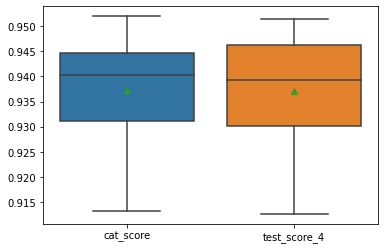

In [27]:
sns.boxplot(data=combo, showmeans=True);

In [28]:
combo.describe()

,cat_score,test_score_4
count,15.000000,15.000000
mean,0.937229,0.937186
std,0.010685,0.011321
min,0.913321,0.912689
25%,0.931060,0.930227
50%,0.940292,0.939321
75%,0.944545,0.946293
max,0.951898,0.951302
